<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%EC%BA%90%EA%B8%80_%EC%9D%98%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

#기본 분류: 의류 이미지 분류

운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


### **패션 MNIST 데이터셋 임포트하기**
10개의 범주와 70000개의 흑백 이미지로 구성된 패션 MNIST
- 해상도: 28x28 픽셀
- 알고리즘의 작동 여부를 확인하기 위해 사용되기도 함
- 60000개의 이미지로 훈련, 10000개의 이미지로 평가

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


labels: 옷의 클래스
- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [3]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Derss', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###**데이터 탐색**

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

###**데이터 전처리**

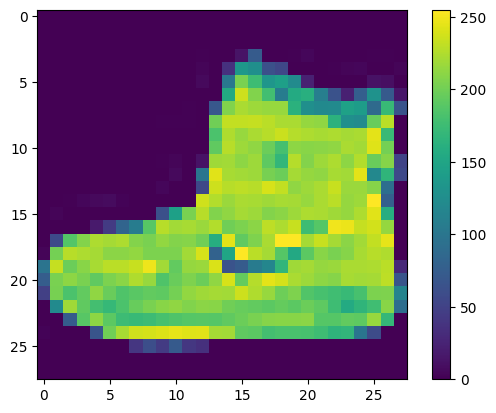

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

값의 범위를 0~1로 조정, 255로 나누어야 함

In [12]:
train_images=train_images/255.0
test_images=test_images/255.0

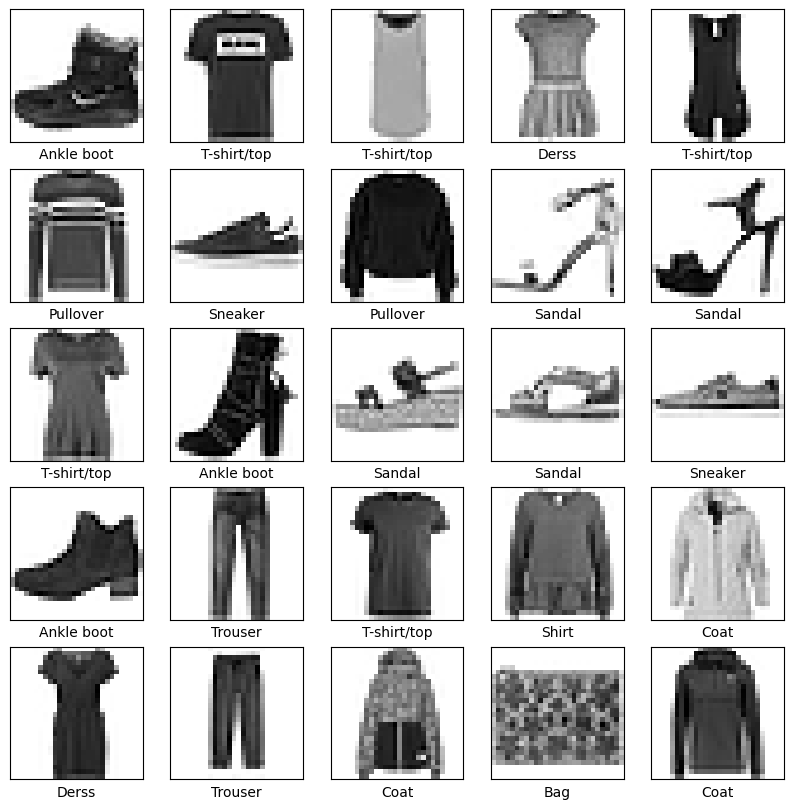

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###**모델 구성**
**층 설정**
- 신경망의 기본 빌딩 블록은 레이어
  - 레이어에 공급된 데이터로부터 표현을 추출
- tf.keras.layers.Dense: 가중치는 훈련하는 동안 학습

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**모델 컴파일**
- 손실함수: 훈련 중 모델이 얼마나 정확한지
- 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 업데이트되는 방식
- 메트릭: 훈련 및 테스트 단계를 모니터링하는 데 사용

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###**모델 훈련**
1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측
4. 예측이 일치하는지 확인

**모델 피드**

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5005 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3716 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3383 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3142 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2954 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2826 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2687 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2598 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2492 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

**정확도 평가**

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3465 - accuracy: 0.8799 - 965ms/epoch - 3ms/step

Test accuracy: 0.8798999786376953


테스트 정확도가 훈련 세트보다 조금 낮음: 과대적합 때문
- 과대적합 시연
- 과대적합을 방지하기 위한 전략

**예측하기**

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions[0]

array([2.3686564e-08, 5.1714755e-10, 6.0489735e-10, 1.3761750e-09,
       8.2225222e-09, 1.1211312e-03, 1.8713614e-08, 4.8106723e-03,
       1.4866071e-09, 9.9406803e-01], dtype=float32)

10개의 숫자 배열: 10개의 옷 품목에 상응하는 모델의 신뢰도

In [21]:
np.argmax(predictions[0])

9

앵클부츠라고 가장 확신

10개 클래스에 대한 예측을 그래프로 표현

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###**예측 확인**
원소의 이미지, 예측. 신뢰도 점수 배열

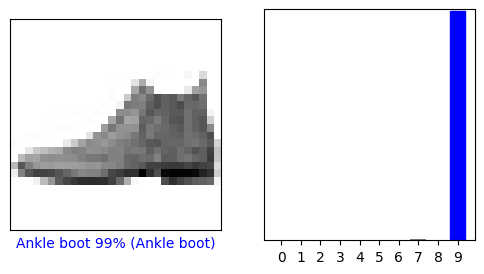

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

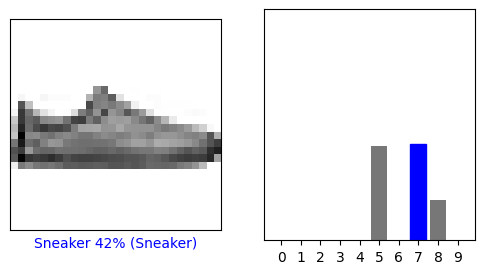

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

올바르게 예측된 레이블: 파란색
잘못 예측된 레이블: 빨강색

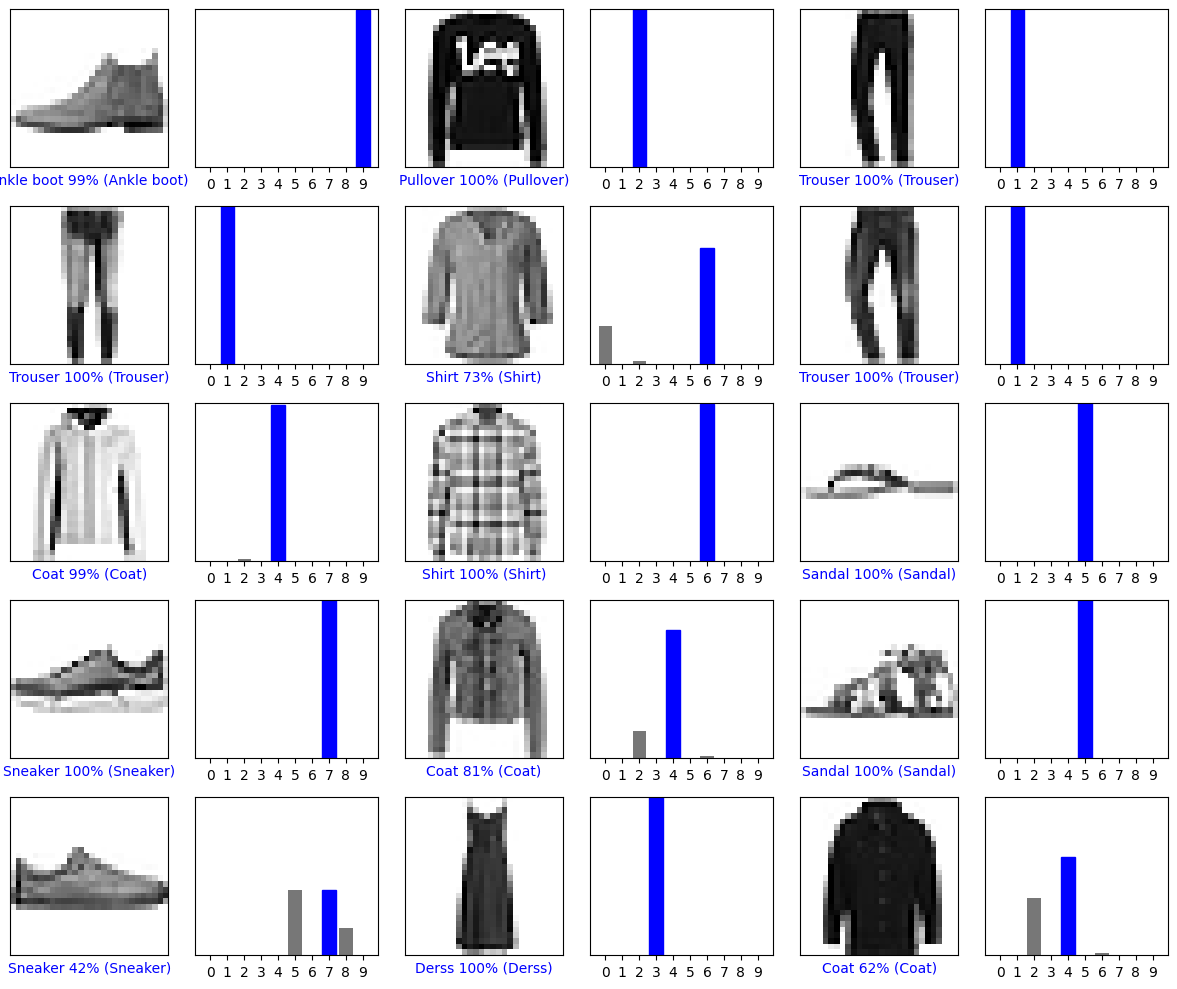

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


###**훈련된 모델 사용**


In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


하나의 이미지를 사용할 때에도 2차원 배열로 변경

In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 97ms/step
[[5.2803211e-05 3.6099972e-13 9.9923670e-01 9.4197004e-18 5.7051808e-04
  2.4956324e-12 1.3992158e-04 4.7459734e-14 2.2934957e-08 4.4219538e-14]]


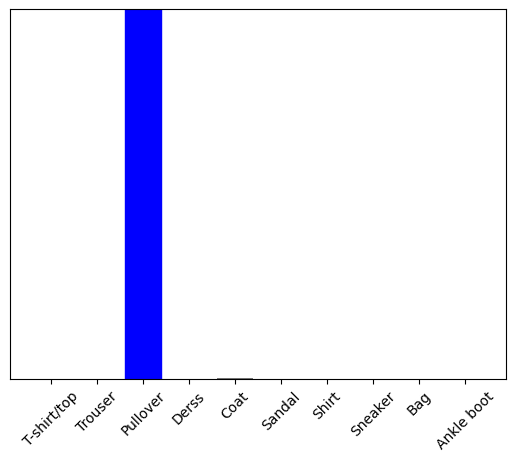

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2